In [1]:
#importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importa o dataframe de treinamento(histórico)
diamonds=pd.read_csv('diamonds.csv',index_col=False)

In [3]:
#Transforma a variável clarity em numérica
diamonds['clarity_'] = diamonds['clarity'].replace(
    ['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
    ,[1,2,3,4,5,6,7,8])

In [4]:
#Transforma a variável ccolor em numérica
diamonds['color_'] = diamonds['color'].replace(
    ['J',"I","H","G","F","E","D"]
    ,[1,2,3,4,5,6,7])  

In [5]:
diamonds['cut_'] = diamonds['cut'].replace(
    ["Fair", "Good", "Very Good", "Premium", "Ideal"]
    ,[1,2,3,4,5])

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3


In [7]:
"Resumo do dataframe de treinamento"
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_,color_,cut_
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,4.055456,4.407254,3.906416
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.645542,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,8.000000,7.000000,5.000000


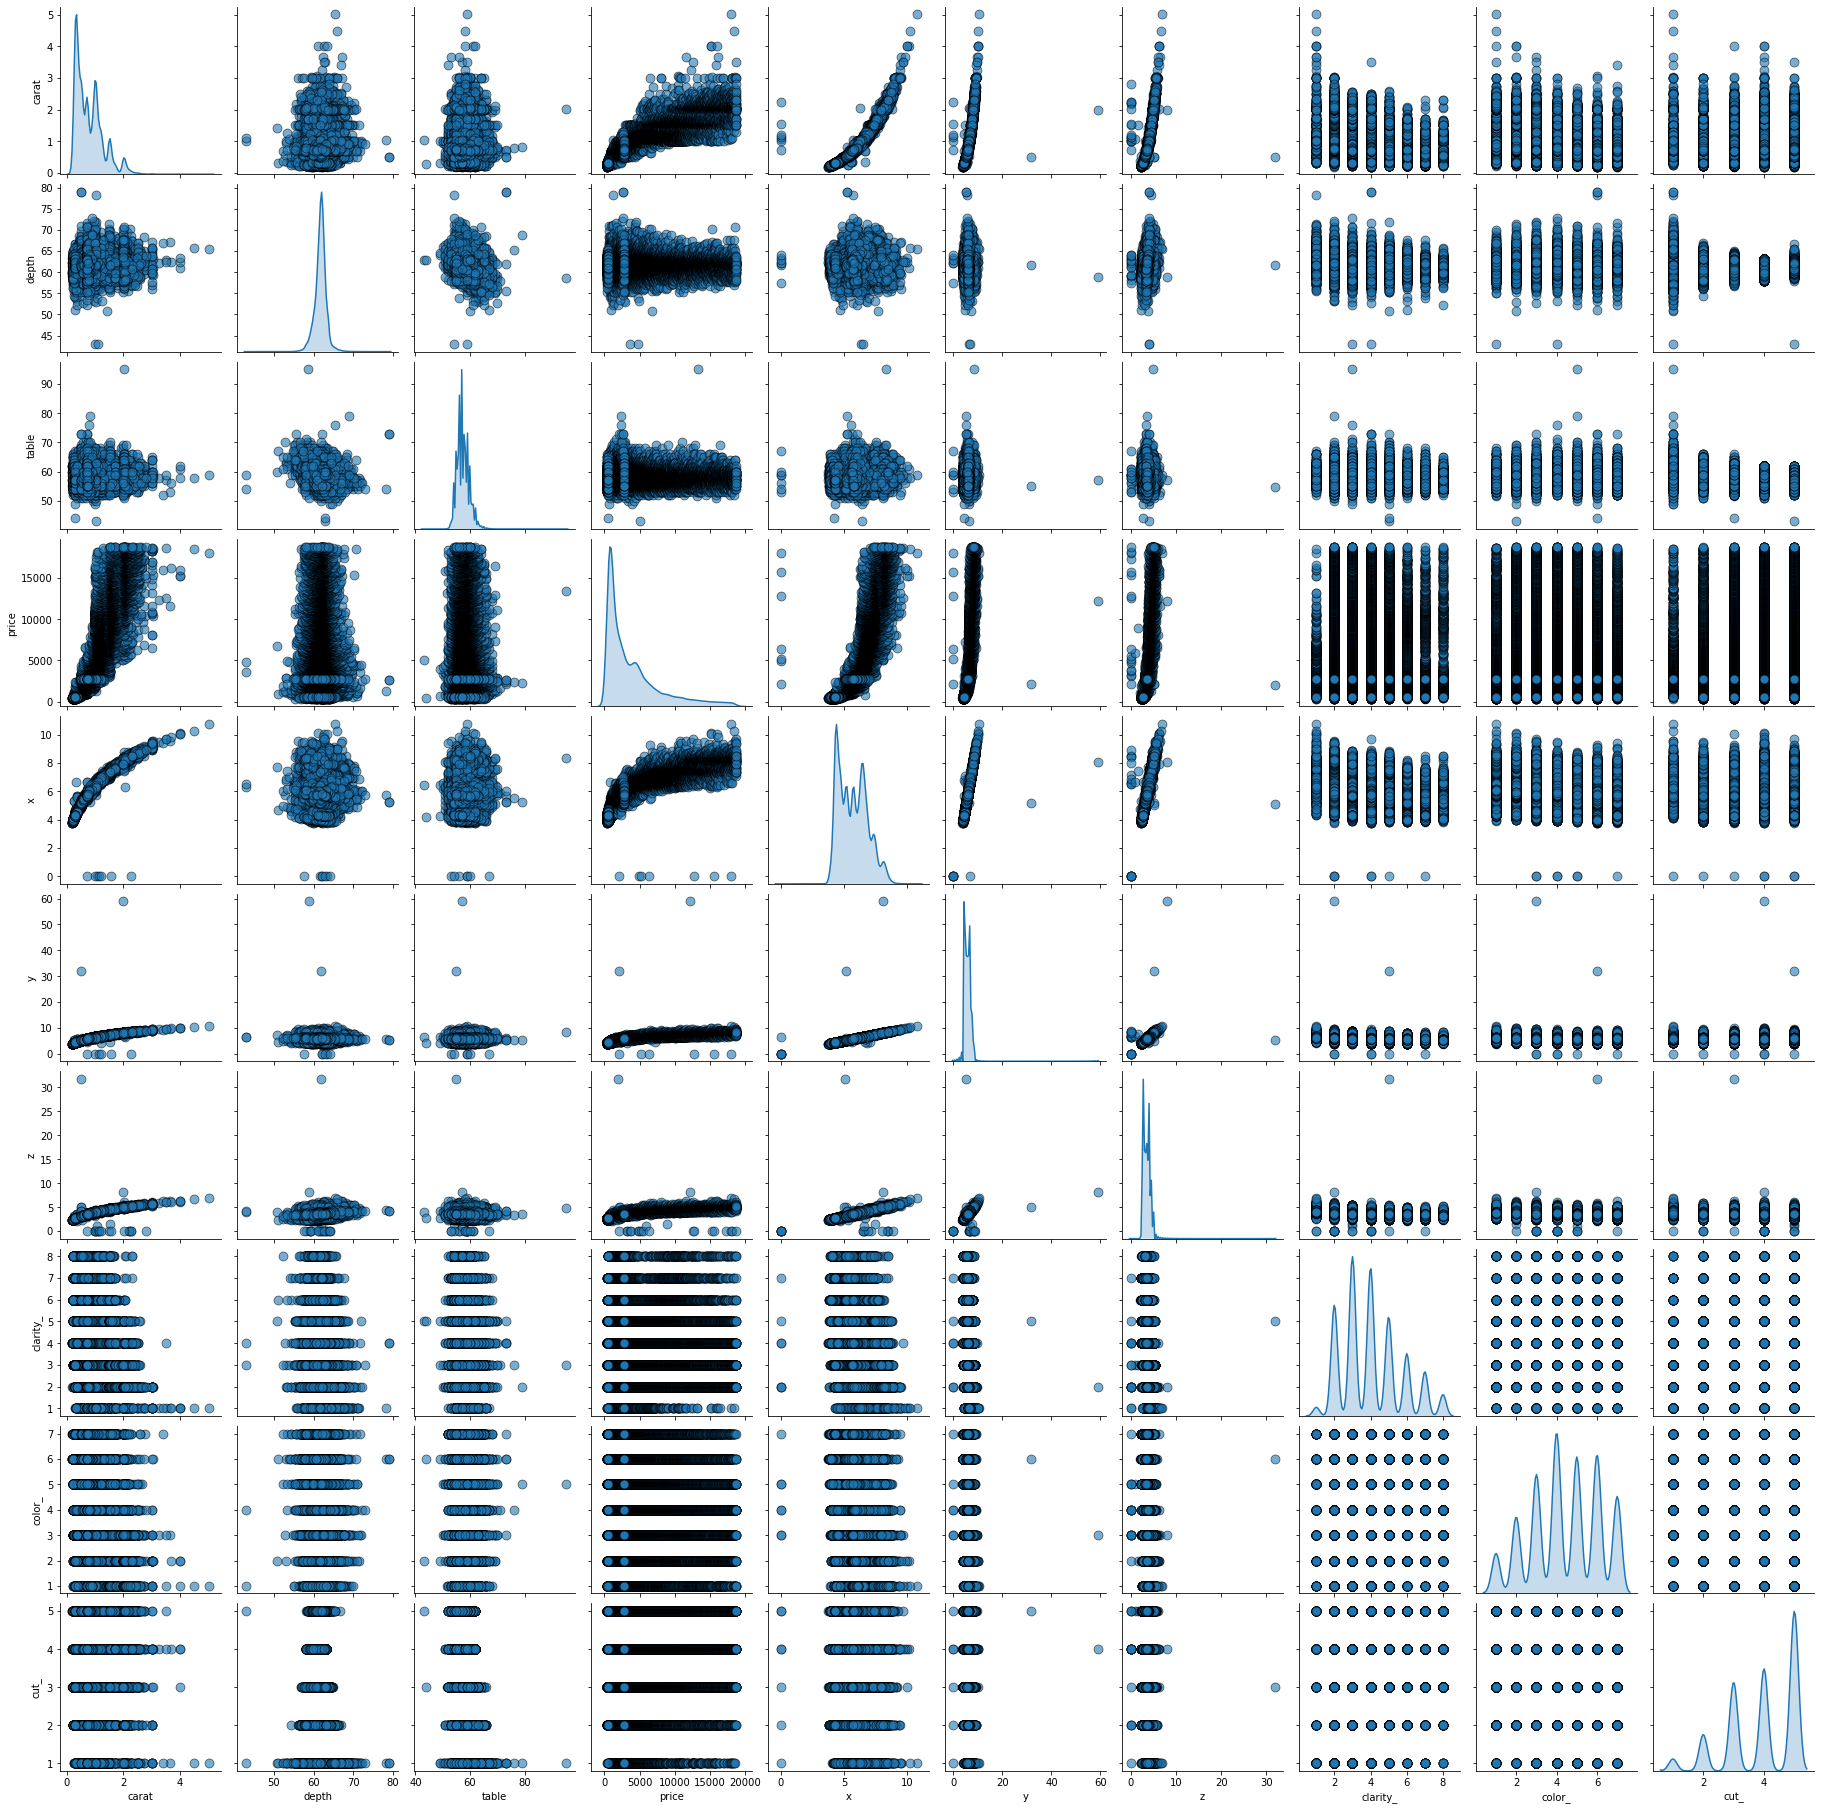

In [8]:
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

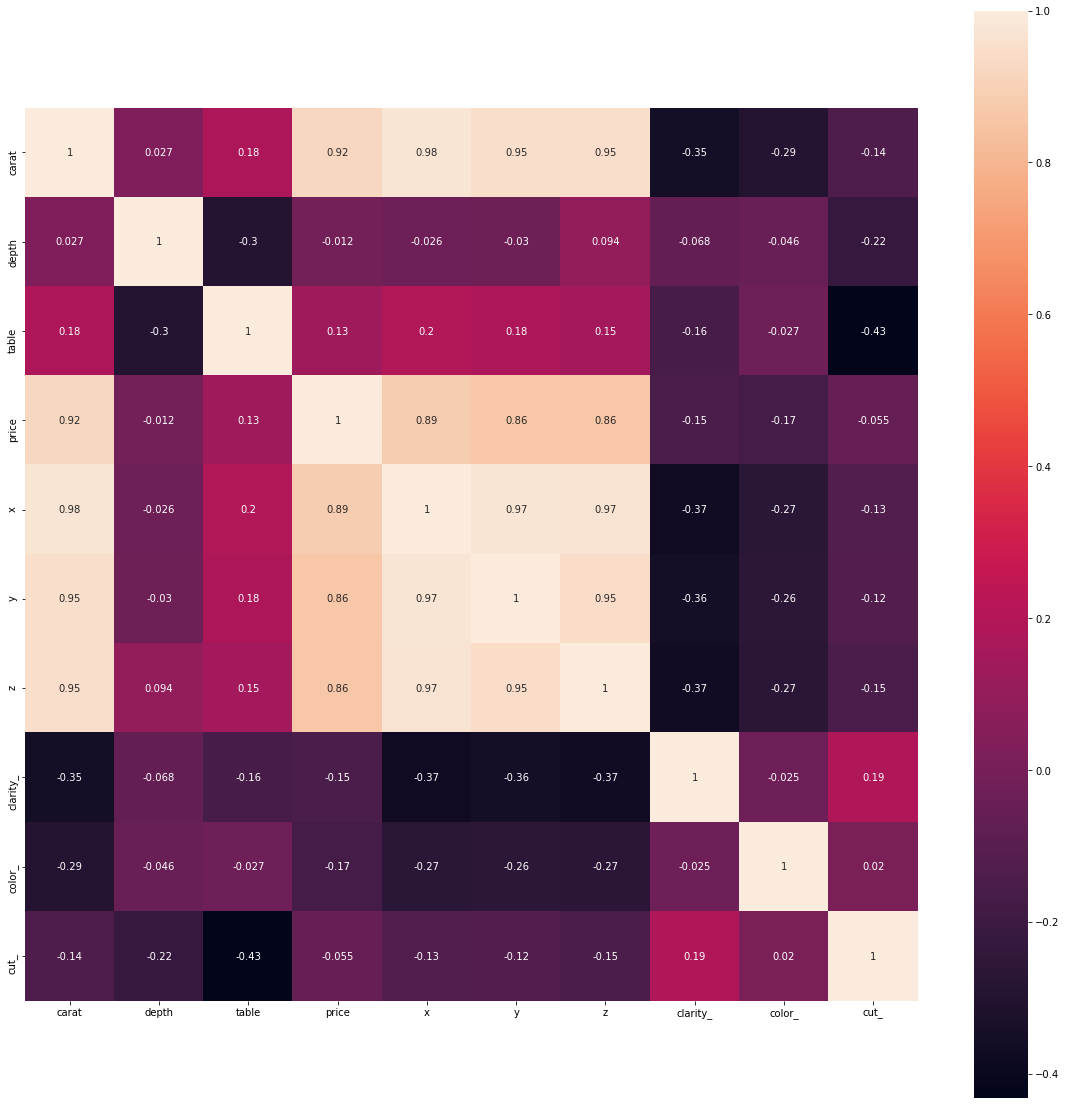

In [9]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

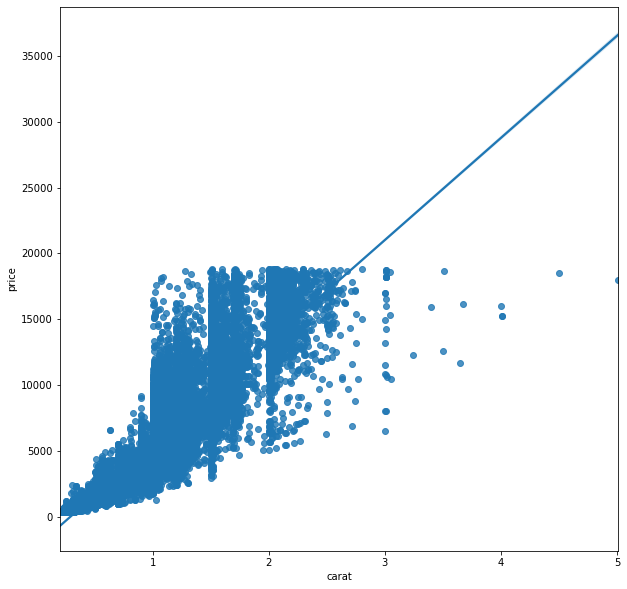

In [10]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)

In [11]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8504268875149495

Modelo

In [12]:
from sklearn.linear_model import LinearRegression

X = diamonds[['carat']]
y_obs = diamonds['price']

model = LinearRegression()
model.fit(X, y_obs)

LinearRegression()

In [13]:
y_pre=model.predict(X)

Cálculo do erro do modelo

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
np.sqrt(mean_squared_error(y_obs, y_pre))


1542.8464716474002

Importando dataset dos diamantes de Rick

In [16]:
rick=pd.read_csv("rick_diamonds.csv")

In [17]:
#Tratamento das variáveis categóricas
rick['cut_'] = rick['cut'].replace(
    ["Fair", "Good", "Very Good", "Premium", "Ideal"]
    ,[1,2,3,4,5])
rick['clarity_'] = rick['clarity'].replace(
    ['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
    ,[1,2,3,4,5,6,7,8])
rick['color_'] = rick['color'].replace(
    ['J',"I","H","G","F","E","D"]
    ,[1,2,3,4,5,6,7]) 

Aplicação do modelo ao dataset de Rick

In [18]:
X1 = rick[['carat']]
rick["price_predicted"]=model.predict(X1)
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,2,3,4804.879333
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,4,5,692.422362
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,4,3,1778.731751
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,5,4,6279.156361
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,2,4,15435.192637


In [19]:
rick.to_csv("rick_test.csv")

In [20]:
""" Mean squared_erro deu 1605.15 com regressão linear com a variável carat"""

' Mean squared_erro deu 1605.15 com regressão linear com a variável carat'

Regressão com mais variávels

In [21]:
X6 = diamonds[['carat','x','y','z','cut_',"clarity_","color_"]]
y_obs6 = diamonds['price']

model6 = LinearRegression()
model6.fit(X6, y_obs6)

LinearRegression()

In [22]:
y_pre6=model6.predict(X6)

In [23]:
np.sqrt(mean_squared_error(y_obs6, y_pre6))


1214.1624322865962

Aplicando o modelo com mais variáveis ao dataset de rick

In [24]:
X16 = rick[['carat','x','y','z','cut_',"clarity_","color_"]]

In [25]:
rick["price_predicted"]=model6.predict(X16)
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,2,3,3161.128306
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,4,5,217.303985
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,4,3,1105.076435
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,5,4,6934.805577
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,2,4,16505.622425


In [26]:
rick.to_csv("rick_test6.csv")

In [27]:
""" Mean squared_erro deu 1288.46 com regressão linear com a variável carat"""

' Mean squared_erro deu 1288.46 com regressão linear com a variável carat'

In [28]:
#rick=rick.drop(columns=['price_predicted'],axis=1)
rick

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,2,3,3161.128306
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,4,5,217.303985
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,4,3,1105.076435
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,5,4,6934.805577
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,2,4,16505.622425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,2,7,-516.142285
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,6,5,2740.601942
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,3,5,5208.715904
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,7,5,1710.765754


Análise das variáveis

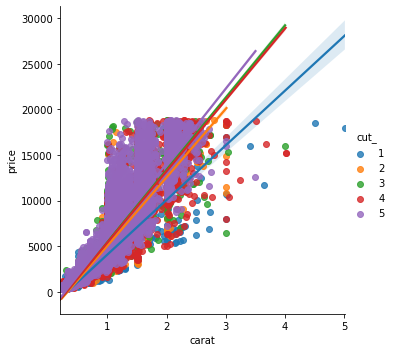

In [29]:
sns.lmplot(data=diamonds, x="carat", y="price", hue="cut_")


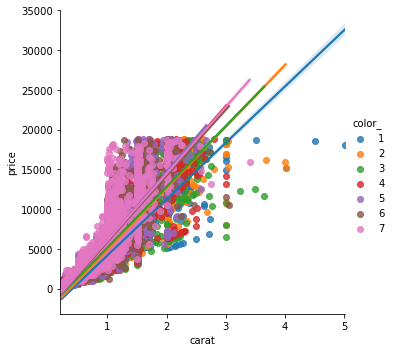

In [30]:
sns.lmplot(data=diamonds, x="carat", y="price", hue="color_")


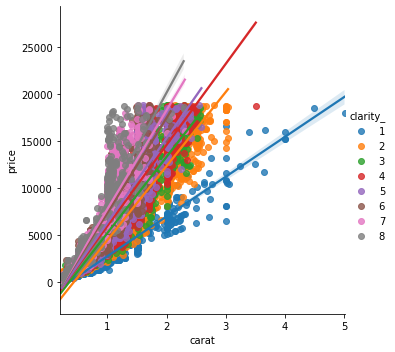

In [31]:
sns.lmplot(data=diamonds, x="carat", y="price", hue="clarity_")


Teste com função

In [41]:
def fit_and_pred(clarity):
    diamonds_clarity=diamonds.loc[diamonds['clarity_']==clarity]
    X_clarity = diamonds_clarity[['carat','x','y','z','cut_',"clarity_","color_"]]
    y_obs_clarity = diamonds_clarity['price']

    model_clarity = LinearRegression()
    model_clarity.fit(X_clarity, y_obs_clarity)

    #Seleção do dataFrame de Rick e aplicação do modelo
    rick_=rick.loc[rick['clarity_']==clarity]
    Xrick = rick_[['carat','x','y','z','cut_',"clarity_","color_"]]
    rick_['price_predicted']=model_clarity.predict(Xrick)
    
    return rick_

In [42]:
rick_1=fit_and_pred(1)


<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [43]:
rick_2=fit_and_pred(2)



<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [44]:
rick_3=fit_and_pred(3)


<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [45]:
rick_4=fit_and_pred(4)


<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [46]:
rick_5=fit_and_pred(5)


<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [47]:
rick_6=fit_and_pred(6)


<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [48]:
rick_7=fit_and_pred(7)

<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


In [49]:
rick_8=fit_and_pred(8)
rick_8

<ipython-input-41-73ee0796f9b1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_['price_predicted']=model_clarity.predict(Xrick)


,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
9,0.73,Ideal,H,IF,61.6,55.0,5.80,5.82,3.58,5,8,3,4496.529902
19,0.30,Ideal,G,IF,62.2,55.0,4.30,4.32,2.68,5,8,4,606.364311
44,1.26,Very Good,F,IF,60.0,60.0,7.04,7.09,4.24,3,8,5,12071.528879
48,0.32,Ideal,G,IF,61.0,57.0,4.44,4.48,2.72,5,8,4,709.176633
61,0.34,Ideal,E,IF,61.7,56.0,4.46,4.48,2.76,5,8,6,2284.478005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,0.30,Ideal,G,IF,61.8,57.0,4.28,4.31,2.65,5,8,4,631.134567
4915,0.28,Ideal,H,IF,63.0,55.0,4.14,4.19,2.62,5,8,3,-187.978649
4933,0.34,Ideal,D,IF,62.1,57.0,4.46,4.52,2.79,5,8,7,2829.378469
4955,0.31,Ideal,F,IF,62.2,54.0,4.37,4.41,2.73,5,8,5,1256.118641


In [51]:
rickt=pd.concat([rick_1,rick_2,rick_3,rick_4,rick_5,rick_6,rick_7,rick_8])
rickt

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
29,0.70,Very Good,I,I1,63.2,59.0,5.62,5.59,3.54,3,1,2,1110.539761
57,0.90,Very Good,F,I1,61.9,59.0,6.16,6.18,3.82,3,1,5,2628.906734
113,1.13,Good,G,I1,63.4,58.0,6.58,6.61,4.18,2,1,4,3311.639867
161,0.70,Very Good,G,I1,61.5,63.0,5.73,5.65,3.50,3,1,4,1313.818919
184,2.32,Fair,H,I1,70.5,55.0,7.93,7.90,5.58,1,1,3,7926.343792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,0.30,Ideal,G,IF,61.8,57.0,4.28,4.31,2.65,5,8,4,631.134567
4915,0.28,Ideal,H,IF,63.0,55.0,4.14,4.19,2.62,5,8,3,-187.978649
4933,0.34,Ideal,D,IF,62.1,57.0,4.46,4.52,2.79,5,8,7,2829.378469
4955,0.31,Ideal,F,IF,62.2,54.0,4.37,4.41,2.73,5,8,5,1256.118641


In [52]:
rickt.to_csv("rick_test.csv")

In [53]:
rickt.describe()

,carat,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,3.881400,4.007600,4.39160,3910.525015
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.116774,1.662196,1.71337,3857.980654
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,-1294.430698
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,3.000000,3.000000,3.00000,1027.352275
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,4.000000,4.000000,4.00000,2682.080500
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5.000000,5.000000,6.00000,5560.345861
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,5.000000,8.000000,7.00000,21654.234816


In [62]:
"""Como podemos observar, há alguns casos em que o preço previsto é negativo. Vamos supor que isso não é possível e
tentar tratar esses dados. O primeiro passo é tentar encontra as relações no price_predicted no dataFrame de treinamento"""

'Como podemos observar, há alguns casos em que o preço previsto é negativo. Vamos supor que isso não é possível e\ntentar tratar esses dados'

In [94]:
rickt["price_predicted"][rickt["price_predicted"] < 0] = 0

<ipython-input-94-7a4b97e826d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rickt["price_predicted"][rickt["price_predicted"] < 0] = 0


In [97]:
rickt.describe()

,carat,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,3.881400,4.007600,4.39160,3928.247745
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.116774,1.662196,1.71337,3838.727623
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,3.000000,3.000000,3.00000,1027.352275
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,4.000000,4.000000,4.00000,2682.080500
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5.000000,5.000000,6.00000,5560.345861
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,5.000000,8.000000,7.00000,21654.234816


In [87]:
rickt.loc[rickt["price_predic"]]
=["price_predicted"][rickt["price_predicted"] < 0] = 0
diamonds.loc[(diamonds["x"]==0) | (diamonds["y"]==0) | (diamonds["z"]==0), :]


(285, 13)